✅ Accuracy Score: 0.9834888729361091

🧾 Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1207
           1       0.93      0.95      0.94       186

    accuracy                           0.98      1393
   macro avg       0.96      0.97      0.96      1393
weighted avg       0.98      0.98      0.98      1393


📊 Confusion Matrix:
 [[1193   14]
 [   9  177]]


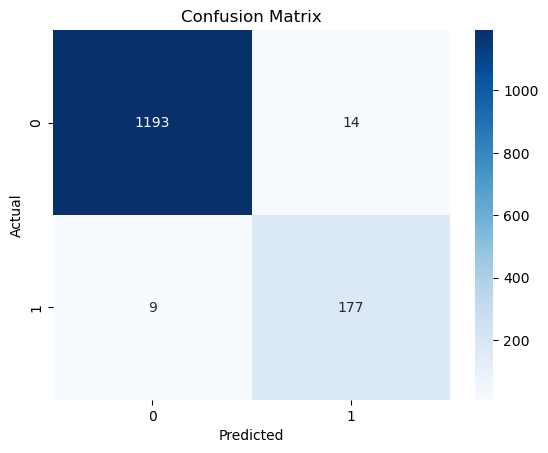

In [1]:
# Spam Email Detection using Scikit-learn

# 📌 Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 📌 Step 2: Load Dataset
# Using a commonly known dataset from UCI repository (you can upload your own .csv instead)
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
df = pd.read_csv(url, sep='\t', header=None, names=['label', 'message'])

# 📌 Step 3: Data Preprocessing
df['label_num'] = df.label.map({'ham': 0, 'spam': 1})

# 📌 Step 4: Text Vectorization
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['message'])
y = df['label_num']

# 📌 Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# 📌 Step 6: Model Training
model = MultinomialNB()
model.fit(X_train, y_train)

# 📌 Step 7: Predictions and Evaluation
y_pred = model.predict(X_test)

print("✅ Accuracy Score:", accuracy_score(y_test, y_pred))
print("\n🧾 Classification Report:\n", classification_report(y_test, y_pred))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# 📌 Step 8: Visualize Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
